# Анализ компьютерных игр

Для анализа доступны исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.



## 1. Изучение общей информации

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from scipy.stats import levene

In [2]:
#просматриваем данные
try:
    data=pd.read_csv("C:/Users/Alina/Downloads/games.csv")
except:
    #data=pd.read_csv('/datasets/games.csv.')
    
    #Код ревьюера
    data=pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 1.1 Вывод по изучение общей информации
Общий просмотр информации выявил пропущенные данные в столбцах, неверно заданный тип данных в столбце с годом, а также названия столбцов указаны не в змеином регистре

## 2. Подготовка данных

In [4]:
#меняем названия столбцов на строчные буквы
data=data.rename(columns=str.lower)
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
#просматриваем строки с пустые значением в столбце name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как строк с пустым значением в столбце 'name' всего 2, год релиза довольно давний, а информации по ним мало, принято решение удалить их


In [7]:
#удаляем строки с пустым значением в названии 
data = data.dropna(axis='index', how='any', subset=['name'])

In [8]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Так как строк с пустым значением в столбце 'year_of_release' меньше 2 процентов, а год релиза необходим для актуальной информации, принято решение удалить данные с пустым значением

In [9]:
#удаляем строки с пустым значением в столбце с годом релиза 
data = data.dropna(axis='index', how='any', subset=['year_of_release'])

In [10]:
#поменяем формат в столбце с годом релиза на специализированный
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       9839 non-null   object        
 10  rating           9768 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.5+ MB


In [12]:
# просматриваем общую информацию о столбцу critic_store
data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [13]:
# просматриваем значения в столбце rating
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пустые значения в столбцах critic_store, user_score и rating заполнять нулями не будем, так как возможно оценка по данным играм не проводилась, а заполнение их каким-либо значениями, может повлиять на среднее значение оценки по всем играм

In [14]:
data['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

В столбце user_score выявлено значение tbd, как подсказывает интернет это значение расшифровывается как' To Be Determined', то есть оценка будет определена в будущем, либо  она в процессе.

Так оценки пока нет, принято решение заменить значения на пустые и для дальнейшей работы перевести тип данных данного столбца в числовой

In [15]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 

In [16]:
data['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [17]:
#создаем новый столбец sales с суммой всех продаж
data['sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           9768 non-null   object        
 11  sales            16444 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.6+ MB


### 2.1 Выводы по подготовке данных

В рамке подготовки данных:
- были изменены типы данных:
        - столбца year_of_release на специализированной по работе с датами;
        - столбца user_score на числовой
- удалены строки с пустыми значениями в столбцах 'name' и 'year_of_release', так как их меньше 2%, и нам необходима актуальна информация с годами выпуска релиза
- в столбце user_score  значение tbd ' To Be Determined' заменено на пустое
- добавлен столбец sales с общим суммированием данных по продажам со всех регионов




## 3. Исследовательский анализ данных

In [19]:
#просматриваем  сколько игр выпускалось в разные годы
data.groupby('year_of_release').count()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
year_of_release,,,,,,,,,,,
1980-01-01,9,9,9,9,9,9,9,0,0,0,9
1981-01-01,46,46,46,46,46,46,46,0,0,0,46
1982-01-01,36,36,36,36,36,36,36,0,0,0,36
1983-01-01,17,17,17,17,17,17,17,0,0,0,17
1984-01-01,14,14,14,14,14,14,14,0,0,0,14
1985-01-01,14,14,14,14,14,14,14,1,1,1,14
1986-01-01,21,21,21,21,21,21,21,0,0,0,21
1987-01-01,16,16,16,16,16,16,16,0,0,0,16
1988-01-01,15,15,15,15,15,15,15,1,1,1,15


Большой рост количества выпускаемых игр по сравнению с прошлым годом происходит в 2002 году.

In [20]:
#просмотрим данные по продажам на платформах в порядке убывания
platform_sales=pd.pivot_table(data,index='platform', values='sales', aggfunc='sum')
platform_sales=platform_sales.sort_values(by="sales", ascending=False)
display(platform_sales)


,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


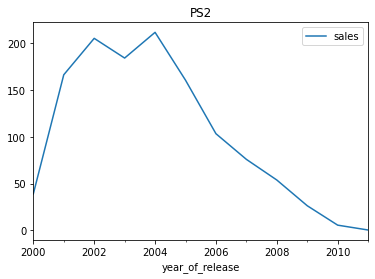

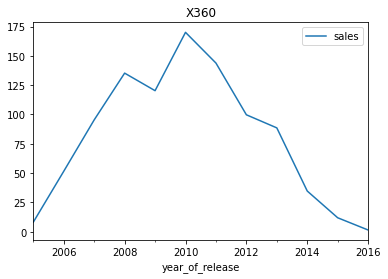

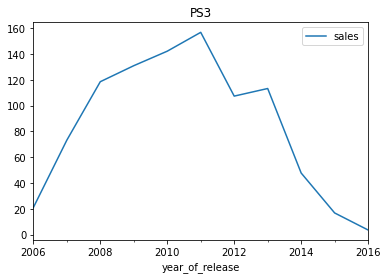

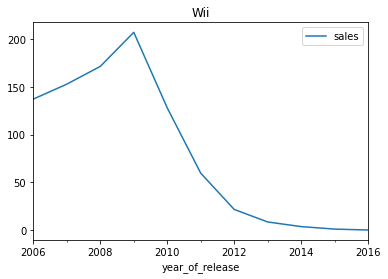

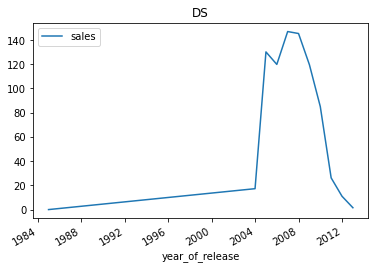

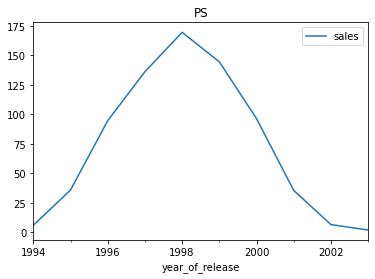

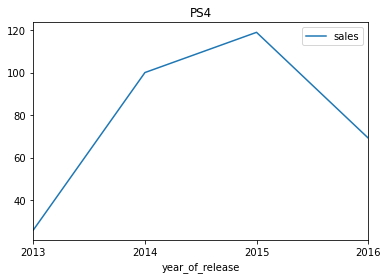

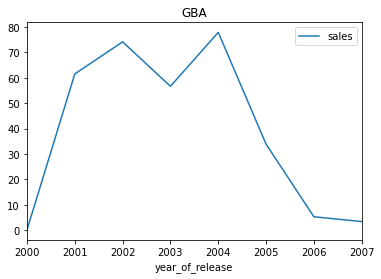

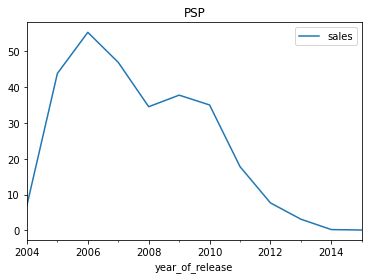

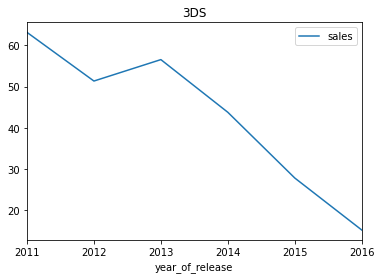

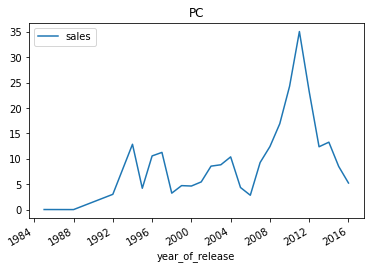

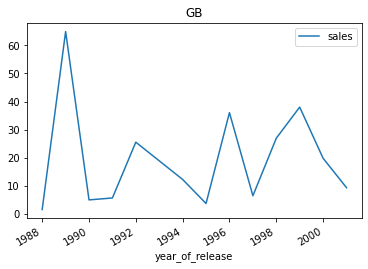

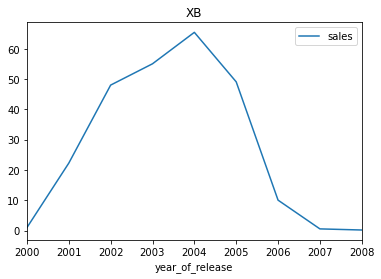

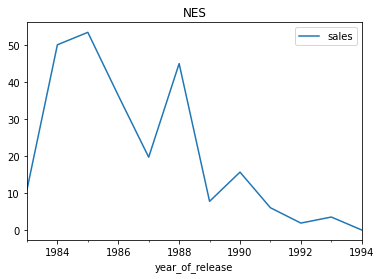

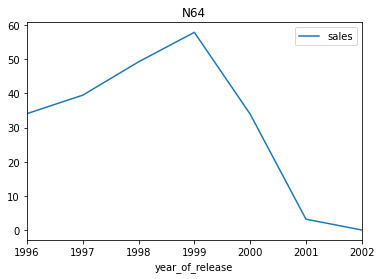

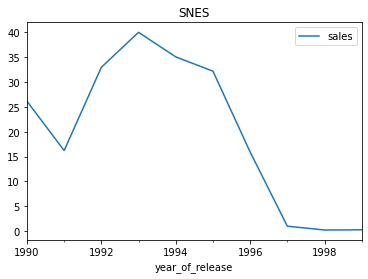

In [21]:
#выберем самые популярные по продажам платформы, чьи объемы продаж больше 200
pop_platform=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS', 'PC', 'GB', 'XB', 'NES', 'N64', 'SNES']
#построим  распределение продаж по этим платформам по годам
for platform in pop_platform:
    data[data['platform']==platform].pivot_table(index='year_of_release', values='sales',aggfunc='sum').plot(title=platform)

Платформы в основном осуществляют свою деятельность 6-8 лет

In [22]:
#выберем данные c 2013 года
data_new=data.query('year_of_release >2012')
display(data_new)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014-01-01,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [23]:
#просмотрим повторно данные по продажам на платформах в порядке убывания
platform_sales_new=pd.pivot_table(data_new,index='platform', values='sales', aggfunc='sum')
platform_sales_new=platform_sales_new.sort_values(by="sales", ascending=False)
display(platform_sales_new)

,sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


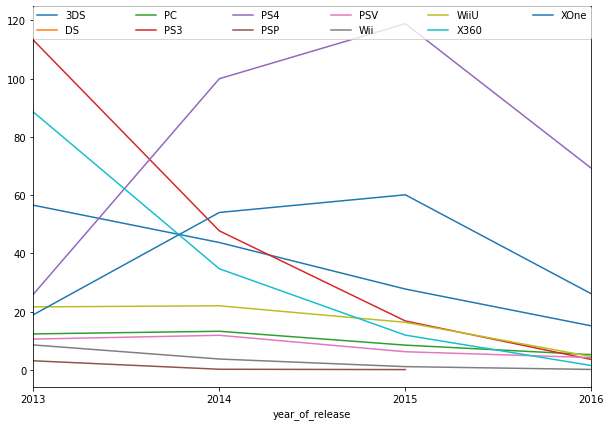

In [24]:
#построим графики продаж по платформам
data_new.groupby(['platform', 'year_of_release'])['sales'].sum().unstack('platform').plot(figsize=(10,7))
plt.legend(loc='upper center',
               mode='expand',
               borderaxespad=0,
               ncol=6)

Cамыми перспективными платформами являются на сегодня - PS4, Xone, 3DS. Продажы на данных платформах выше остальных.


<AxesSubplot:xlabel='platform', ylabel='sales'>

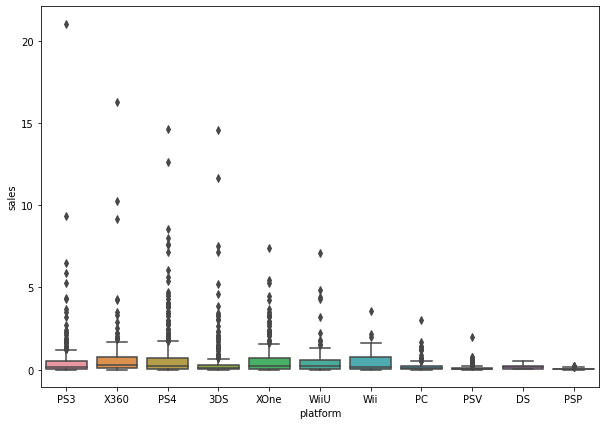

In [25]:
# построим распределение продаж по платформам
plt.figure(figsize=(10,7))
sns.boxplot(x=data_new['platform'], y=data_new['sales'])



Просмотрев распределение продаж по платформам, выявлены очень яркие выбросы продаж у платформ PS3, PS4, 3DS, X360. Продажи некоторых игр на данных платформах значительно превышали средние значение.

In [26]:
#Посмотрим данные по одной из очень популярных платформ за последние 3 года - PS4
dataPS4=data_new.loc[data_new['platform']=='PS4']
display(dataPS4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014-01-01,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016-01-01,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016-01-01,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016-01-01,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


<AxesSubplot:xlabel='critic_score', ylabel='sales'>

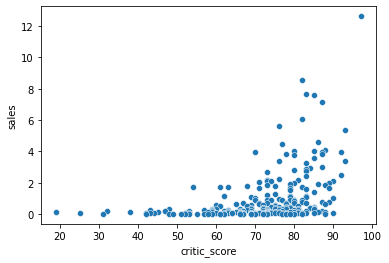

In [27]:
#построим диаграмму рассеяния для показателей "оценка критиков" и "продажи" платформы PS4
sns.scatterplot(data=dataPS4, x='critic_score', y='sales')

<AxesSubplot:xlabel='user_score', ylabel='sales'>

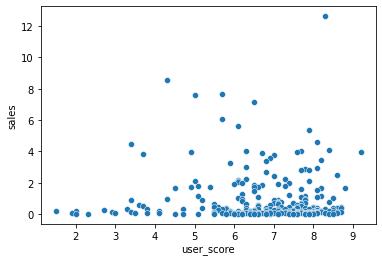

In [28]:
#построим диаграмму рассеяния для показателей "оценка пользователей" и "продажи" платформы PS4
sns.scatterplot(data=dataPS4, x='user_score', y='sales')

In [29]:
display(dataPS4['critic_score'].corr(dataPS4['sales']))
display(dataPS4['user_score'].corr(dataPS4['sales']))


0.40656790206178123

-0.03195711020455644

Расчет коэффициента корреляции  между оценкой критиков и продажами на платформе PS4 указывает на большую прямую зависимость между этими двумя параметрами. Зависимость между оценкой пользователей и продажами не наблюдается.

In [30]:
#проверим аналогичные взаимосвязи для платформы Xone
dataXone=data_new.loc[data_new['platform']=='XOne']

<AxesSubplot:xlabel='critic_score', ylabel='sales'>

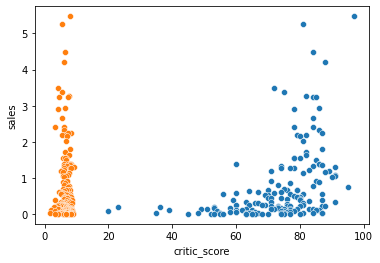

In [31]:
sns.scatterplot(data=dataXone, x='critic_score', y='sales', legend="full")
sns.scatterplot(data=dataXone, x='user_score', y='sales')

In [32]:
display(dataXone['critic_score'].corr(dataXone['sales']))
display(dataXone['user_score'].corr(dataXone['sales']))

0.41699832800840153

-0.06892505328279418

Расчет коэффициента корреляции  между оценкой критиков и продажами на платформе Xone указывает на большую прямую зависимость между этими двумя параметрами. Зависимость между оценкой пользователей и продажами не наблюдается.

In [33]:
#просмотрим данные по платформе 3DS
data3DS=data_new.loc[data_new['platform']=='3DS']


<AxesSubplot:xlabel='critic_score', ylabel='sales'>

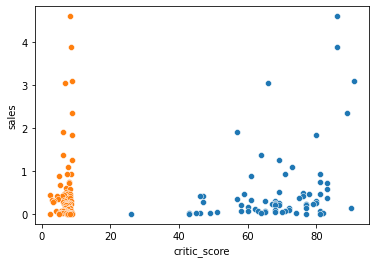

In [34]:
sns.scatterplot(data=data3DS, x='critic_score', y='sales', legend="full")
sns.scatterplot(data=data3DS, x='user_score', y='sales')

In [35]:
#просчитаем коэффициент корреляции между оценками и продажами
display(data3DS['critic_score'].corr(data3DS['sales']))
display(data3DS['user_score'].corr(data3DS['sales']))

0.3570566142288104

0.24150411773563005

Расчет коэффициента корреляции  между оценкой критиков и продажами на платформе 3DS указывает на бОльшую прямую зависимость между этими двумя параметрами. Зависимость между оценкой пользователей и продажами не такая яркая.

In [36]:
#просмотрим продажи по жанрам
genre_sales_new=pd.pivot_table(data_new,index='genre', values='sales', aggfunc='median')
genre_sales_new=genre_sales_new.sort_values(by="sales", ascending=False)
display(genre_sales_new)

,sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


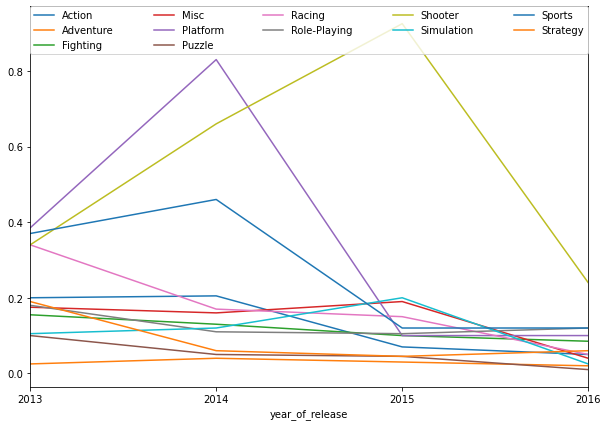

In [37]:
#просмотрим как менялись продажи по жанрам, по годам
data_new.groupby(['genre', 'year_of_release'])['sales'].median().unstack('genre').plot(figsize=(10,7))
plt.legend( loc='upper center',
               mode='expand',
               borderaxespad=0,
               ncol=5)

<AxesSubplot:xlabel='year_of_release'>

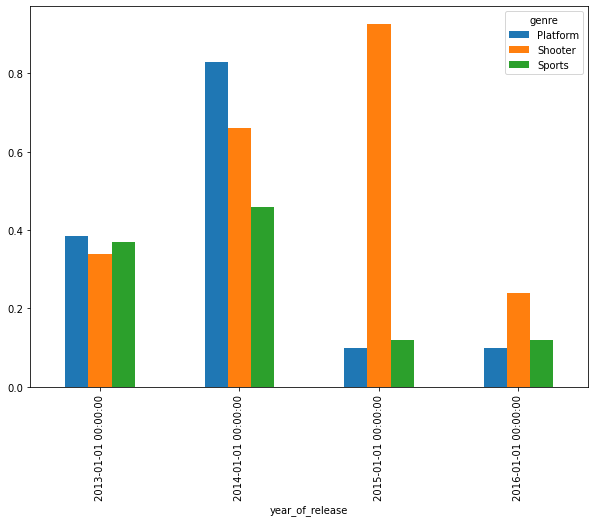

In [38]:
data_pop_genre=data_new.loc[(data_new['genre']=='Shooter') | (data_new['genre']=='Sports') | (data_new['genre']=='Platform') ]
data_pop_genre.groupby(['genre', 'year_of_release'])['sales'].median().unstack('genre').plot(kind='bar', figsize=(10,7))

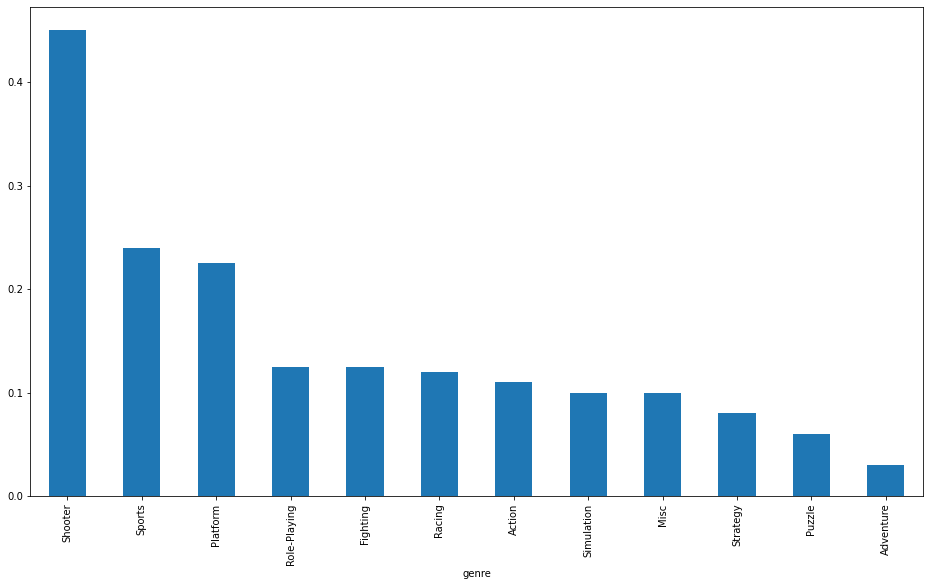

In [40]:

data_new.groupby('genre')['sales'].median()\
    .sort_values(ascending = False)\
    .plot(kind = 'bar', figsize = (16,9))
plt.show()

### 3.1 Выводы по исследовательскому анализу данных

Просмотрев данные о продажах по платформам было выявлено следующее:

    - самый большое количество игр выпускалось в 2008-2009 годах;
    - на сегодня количество выпускаемых игр становится меньше и меньше;
    - платформы обычно осуществляют активную деятельность в течение 6-8 лет;
    - для анализа данных были выбраны данные c 2013 года;
    - самыми перспективными являются на сегодня - PS4, Xone, 3DS. Продажы на данных платформах за последние годы выше остальных;
    - зависимость между оценками  критиков и объемом продаж выше, чем между оценкой пользователей и объемом продаж.

Проанализировав данные о  медиана продаж в жанрах, выявлено, что самыми популярными жанрами являются Shooter, Sports и Platform.
Наименее популярными жанры- Strategy, Puzzle, Adventure. 


## 4. Портрет пользователя каждого региона

In [41]:
# просмотрим продажи по платформам в различных регионах, посчитаем долю продаж
platform_sales_region=pd.pivot_table(data_new,index='platform', values=('na_sales', 'eu_sales', 'jp_sales', 'sales'), aggfunc='sum')
platform_sales_region=platform_sales_region.sort_values(by="sales", ascending=False)
platform_sales_region['share_eu']=platform_sales_region['eu_sales']/platform_sales_region['sales']
platform_sales_region['share_jp']=platform_sales_region['jp_sales']/platform_sales_region['sales']
platform_sales_region['share_na']=platform_sales_region['na_sales']/platform_sales_region['sales']
display(platform_sales_region)

,eu_sales,jp_sales,na_sales,sales,share_eu,share_jp,share_na
platform,,,,,,,
PS4,141.09,15.96,108.74,314.14,0.449131,0.050805,0.346151
PS3,67.81,23.35,63.50,181.43,0.373753,0.128700,0.349997
XOne,51.59,0.34,93.12,159.32,0.323814,0.002134,0.584484
3DS,30.96,67.81,38.20,143.25,0.216126,0.473368,0.266667
X360,42.52,0.51,81.66,136.80,0.310819,0.003728,0.596930
WiiU,19.85,10.88,29.21,64.63,0.307133,0.168343,0.451957
PC,25.36,0.00,11.11,39.43,0.643165,0.000000,0.281765
PSV,6.10,18.59,5.04,32.99,0.184905,0.563504,0.152774
Wii,5.93,0.05,6.56,13.66,0.434114,0.003660,0.480234


Просматривая продажи по ТОП-5 платформам в различных регионах, можно сделать вывод, что основная доля продаж приходится на Северную Америку, за исключением продаж на платформе PS4 (основная доля продаж - в Европе). Меньше всего продаж приходится на Японию

In [42]:
#просмотрим продажи на платформах в Европе
platform_eu_sales=pd.pivot_table(data_new,index='platform', values=('eu_sales'), aggfunc='sum')
platform_eu_sales=platform_eu_sales.sort_values(by="eu_sales", ascending=False)
platform_eu_sales['shape_sales']=platform_eu_sales['eu_sales']/(platform_eu_sales['eu_sales'].sum())
display(platform_eu_sales)

,eu_sales,shape_sales
platform,,
PS4,141.09,0.359712
PS3,67.81,0.172883
XOne,51.59,0.131530
X360,42.52,0.108406
3DS,30.96,0.078933
PC,25.36,0.064656
WiiU,19.85,0.050608
PSV,6.10,0.015552
Wii,5.93,0.015119


Самыми популярными платформами в Европе являются -PS3, X360, Wii, DS, PS4.
Общая доля продаж на этих платформах составляет 76 процентов

In [43]:
#просмотрим продажи на платформах в Северной Америке
platform_na_sales=pd.pivot_table(data_new,index='platform', values=('na_sales'), aggfunc='sum')
platform_na_sales=platform_na_sales.sort_values(by="na_sales", ascending=False)
platform_na_sales['shape_sales']=platform_na_sales['na_sales']/(platform_na_sales['na_sales'].sum())
display(platform_na_sales)

,na_sales,shape_sales
platform,,
PS4,108.74,0.248429
XOne,93.12,0.212744
X360,81.66,0.186562
PS3,63.50,0.145073
3DS,38.20,0.087272
WiiU,29.21,0.066734
PC,11.11,0.025382
Wii,6.56,0.014987
PSV,5.04,0.011514


Самыми популярными платформами в Северной Америке являются - X360, Wii, PS3, DS, PS2.
Общая доля продаж на этих платформах составляет 79,8 процентов

In [44]:
#просмотрим продажи на платформах в Японии
platform_jp_sales=pd.pivot_table(data_new,index='platform', values=('jp_sales'), aggfunc='sum')
platform_jp_sales=platform_jp_sales.sort_values(by="jp_sales", ascending=False)
platform_jp_sales['shape_sales']=platform_jp_sales['jp_sales']/(platform_jp_sales['jp_sales'].sum())
display(platform_jp_sales)

,jp_sales,shape_sales
platform,,
3DS,67.81,0.481674
PS3,23.35,0.165862
PSV,18.59,0.132050
PS4,15.96,0.113368
WiiU,10.88,0.077284
PSP,3.29,0.023370
X360,0.51,0.003623
XOne,0.34,0.002415
Wii,0.05,0.000355


Самыми популярными платформами в Японии являются - DS, 3DS, PS3, PS2, Wii.
Общая доля продаж на этих платформах составляет 82 процента.

In [45]:
#просмотрим продажи по жанрам в Европе
genre_eu_sales=pd.pivot_table(data_new,index='genre', values=('eu_sales'), aggfunc='sum')
genre_eu_sales=genre_eu_sales.sort_values(by="eu_sales", ascending=False)
genre_eu_sales['shape_sales']=genre_eu_sales['eu_sales']/(genre_eu_sales['eu_sales'].sum())
display(genre_eu_sales)

,eu_sales,shape_sales
genre,,
Action,118.13,0.301175
Shooter,87.86,0.224001
Sports,60.52,0.154297
Role-Playing,36.97,0.094256
Racing,20.19,0.051475
Misc,20.04,0.051092
Platform,15.58,0.039722
Simulation,10.92,0.027841
Fighting,8.55,0.021798


Самыми популярными жанрами в Европе являются - Action, Sports, Shooter, Misc, Racing
На долю этих жанров приходится 73,6 процентов продаж

In [46]:
#просмотрим продажи по жанрам в Северной Америке
genre_na_sales=pd.pivot_table(data_new,index='genre', values=('na_sales'), aggfunc='sum')
genre_na_sales=genre_na_sales.sort_values(by="na_sales", ascending=False)
genre_na_sales['shape_sales']=genre_na_sales['na_sales']/(genre_na_sales['na_sales'].sum())
display(genre_na_sales)

,na_sales,shape_sales
genre,,
Action,126.05,0.287976
Shooter,109.74,0.250714
Sports,65.27,0.149117
Role-Playing,46.40,0.106006
Misc,27.49,0.062804
Platform,18.14,0.041443
Fighting,15.55,0.035526
Racing,12.96,0.029609
Adventure,7.14,0.016312


Самыми популярными жанрами в Северной Америке являются - Action, Sports, Shooter, Misc, Role-Playing.
На долю этих жанров приходится 74,7 процентов продаж

In [47]:
#просмотрим продажи по жанрам в Японии
genre_jp_sales=pd.pivot_table(data_new,index='genre', values=('jp_sales'), aggfunc='sum')
genre_jp_sales=genre_jp_sales.sort_values(by="jp_sales", ascending=False)
genre_jp_sales['shape_sales']=genre_jp_sales['jp_sales']/(genre_jp_sales['jp_sales'].sum())
display(genre_jp_sales)

,jp_sales,shape_sales
genre,,
Role-Playing,51.04,0.362551
Action,40.49,0.287612
Misc,9.20,0.065350
Fighting,7.65,0.054340
Shooter,6.61,0.046953
Adventure,5.82,0.041341
Sports,5.41,0.038429
Platform,4.79,0.034025
Simulation,4.52,0.032107


Самыми популярными жанрами в Японии являются - Role-Playing, Action, Misc, Sports, Platform.
На долю этих жанров приходится 75,1 процента продаж

### 4.1 Вывод по портрету пользователя каждого региона

Если сравнивать объемы продаж игр по платформам в различных регионах:
 - портрет пользователя в Европе и Северной Америке схож. Самыми популярными платформами являются у них PS3, X360, Wii, DS.    
 - однако, в Европе больше популярен PS4, а в Северной Америке - PS2.
 - у пользователей Японии также популярны PS3, PS2, DS, Wii, однако к ним еще и добавляется платформа 3DS
 - самые популярные платформы во всех 3 регионах: PS3, Wii, DS.

Если сравнивать жанры игр в различных регионах:
 - портрет пользователя в Европе и Северной Америке также схож. Самыми популярными жанрами у них являются Action, Sports, Shooter, Misc;
 - однако, в Европе больше популярен жанр игр Racing, а в Северной Америке - Role-Playing;
 - в Японии помимо популярных в других регионах Role-Playing, Action, Misc, Sports, также очень популярен жанр Platform.
 - самые популярные жанры во всех 3 регионах: Action, Misc, Sports.


## 5. Проверка гипотез

### 5.1 Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Для проверки используем t-тест, так как совокупности не зависят друг от друга, размеры выборок достаточно большие.

H0 Нулевая гипотеза:Между средним значением пользовательских рейтингов платформ Xbox One и PC нет существенной разницы

H1 Альтернативная гипотеза:  Существует значительная разница между средним значением пользовательских рейтингов платформ Xbox One и PC

In [48]:
#выделяем отдельные данные по платформам
data_XOne=data_new.loc[data_new['platform']=='XOne']
data_PC=data_new.loc[data_new['platform']=='PC']

In [49]:
#удаляем пустые значения
data_XOne = data_XOne.dropna(axis='index', how='any', subset=['user_score'])
data_PC = data_PC.dropna(axis='index', how='any', subset=['user_score'])

In [50]:
alpha = .01 # задаём критический уровень статистической значимости

results =  st.ttest_ind(
    data_XOne['user_score'], 
    data_PC['user_score'], equal_var=False) #проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) # выводим на экран получившеся p-значение)

if results.pvalue < alpha:# сравниваем получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу, среднее значение пользовательских рейтингов платформ Xbox One и PC различаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


### 5.2 Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные.
Для проверки используем t-тест, так как совокупности не зависят друг от друга, размеры выборок достаточно большие.

H0 Нулевая гипотеза:Между средним значением пользовательских рейтингов жанров Action и Sports нет существенной разницы

H1 Альтернативная гипотеза:  Существует значительная разница между средним значением пользовательских рейтингов жанров Action и Sports

In [51]:
#выделяем отдельные данные по жанрам

data_action=data_new.loc[data_new['genre']=='Action']
data_sports=data_new.loc[data_new['genre']=='Sports']


In [52]:
#удаляем пустые значения в строках
data_action = data_action.dropna(axis='index', how='any', subset=['user_score'])
data_sports = data_sports.dropna(axis='index', how='any', subset=['user_score'])

In [53]:
#проверяем равенство дисперсий с помощью стат.теста Левене
stat, p = levene(data_action['user_score'], data_sports['user_score'])
p

4.2566688218274047e-07

In [54]:
alpha = .01 # задаём критический уровень статистической значимости

results =  st.ttest_ind(
    data_action['user_score'], 
    data_sports['user_score'], equal_var=True) #проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) # выводим на экран получившеся p-значение)

if results.pvalue < alpha:# сравниваем получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу, среднее значение пользовательских рейтингов жанров Action и Sports различаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу, среднее значение пользовательских рейтингов жанров Action и Sports различаются


### 5.3 Выводы по проверке гипотез

Проверяя t-testом гипотезы о средней оценке пользователей выявлено:

- Между средним значением пользовательских рейтингов платформ Xbox One и PC нет существенной разницы

- Существует значительная разница между средним значением пользовательских рейтингов жанров Action и Sports



## 6 Общий вывод


После анализа доступных исторических данных о продажах компьютерных игр, оценки пользователей и экспертов, жанрах и платформах были сделаны следующие выводы:

1. В рамках подготовки данных:
   - были изменены типы данных:
        - столбца year_of_release на специализированной по работе с датами;
        - столбца user_score на числовой
   - удалены строки с пустыми значениями в столбцах 'name' и 'year_of_release', так как их меньше 2%, и нам необходима актуальна информация с годами выпуска релиза
   - в столбце user_score  значение tbd ' To Be Determined' заменено на пустое
   - добавлен столбец sales с общим суммированием данных по продажам со всех регионов
   
 
2. В рамках исследовательского анализа данных выявлено следующее:

    - самый большое количество игр выпускалось в 2008-2009 годах;
    - на сегодня количество выпускаемых игр становится меньше и меньше;
    - платформы обычно осуществляют активную деятельность в течение 6-8 лет;
    - для актуального анализа данных были выбраны данные по платформам с 2013 года;
    - самыми перспективными являются на сегодня - PS4, Xone, 3DS. Продажы на данных платформах за последние годы выше остальных;
    - платформы, переставшие продавать, можно исключить из анализа - это GBA, XB, PS2;
    - зависимость между оценками  критиков и объемом продаж выше, чем между оценкой пользователей и объемом продаж.
    - самыми популярными жанрами являются Shooter, Sports и Platform;
    - наименее популярные жанры- Strategy, Puzzle, Adventure.
    


3. Анализируя портрет пользователя игр выявлено следующее:
    - Если сравнивать объемы продаж игр по платформам в различных регионах:
      - портрет пользователя в Европе и Северной Америке схож. Самыми популярными платформами являются у них PS3, X360, Wii, DS.       - однако, в Европе больше популярен PS4, а в Северной Америке - PS2.
      - у пользователей Японии также популярны PS3, PS2, DS, Wii, однако к ним еще и добавляется платформа 3DS
      - самые популярные платформы во всех 3 регионах: PS3, Wii, DS.

    - Если сравнивать жанры игр в различных регионах:
      - портрет пользователя в Европе и Северной Америке также схож. Самыми популярными жанрами у них являются Action, Sports, Shooter, Misc;
      - однако, в Европе больше популярен жанр игр Racing, а в Северной Америке - Role-Playing;
      - в Японии помимо популярных в других регионах Role-Playing, Action, Misc, Sports, также очень популярен жанр Platform.
      - самые популярные жанры во всех 3 регионах: Action, Misc, Sports.
      

4. Проверка гипотез показала:
    - Между средним значением пользовательских рейтингов платформ Xbox One и PC нет существенной разницы
    - Существует значительная разница между средним значением пользовательских рейтингов жанров Action и Sports
